In [5]:
pip install opencv-python numpy matplotlib pandas scipy scikit-image pytube

**Computer Vision Way**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.7 MB/s eta 0:00:00
All packages installed successfully!
🚀 Starting Amoeba Dynamics Analysis...
Download successful: amoeba_video.mp4
🎬 Processing video...
Loading video frames...
Loaded 150 frames
Analyzing amoeba dynamics...
Processed 30/150 frames
Processed 60/150 frames
Processed 90/150 frames
Processed 120/150 frames
Analysis complete!
📊 Generating results...


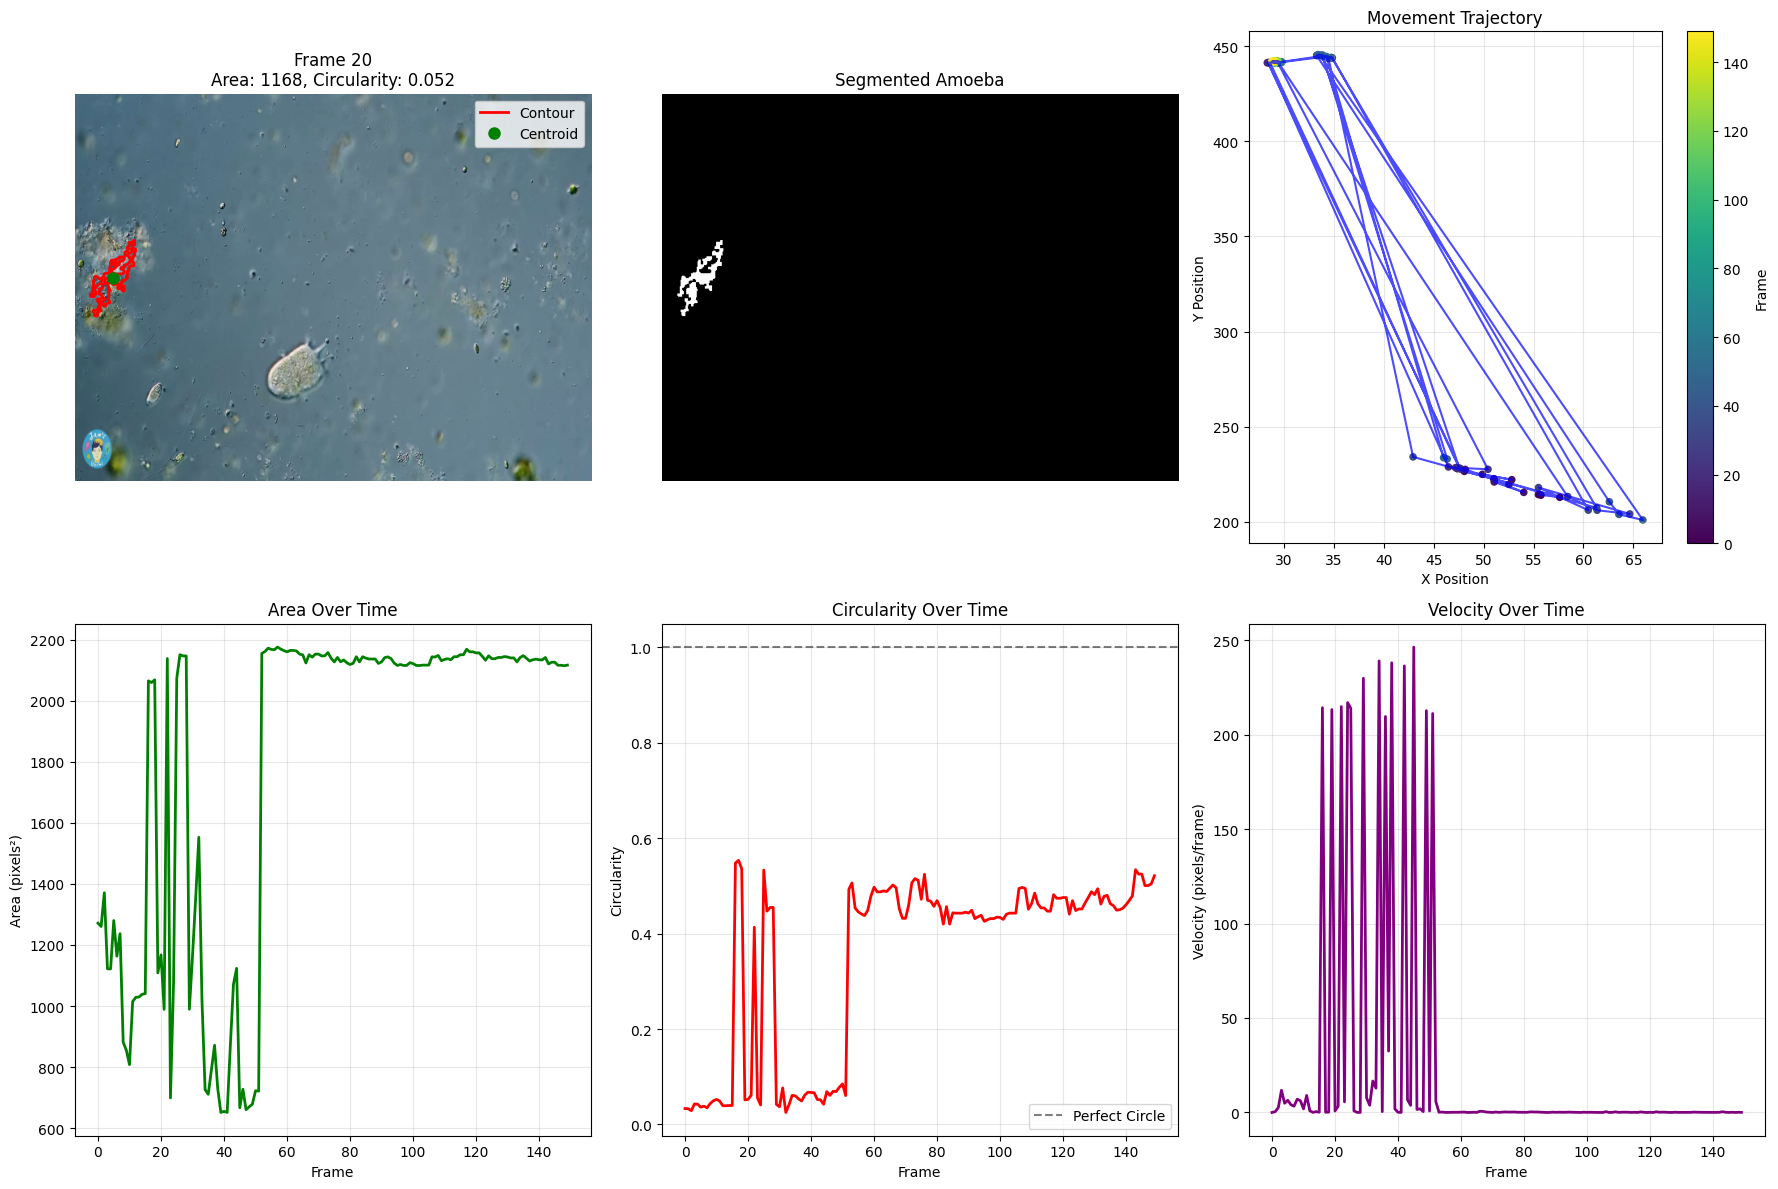

AMOEBA ANALYSIS REPORT

BASIC STATISTICS:
• Frames analyzed: 150
• Average area: 1792.3 ± 550.0 pixels²
• Average circularity: 0.346 ± 0.192
• Average velocity: 20.496 ± 62.521 px/frame

MOVEMENT ANALYSIS:
• Total distance traveled: 3074.3 pixels
• Maximum velocity: 246.316 px/frame

SHAPE DYNAMICS:
• Area variation: 1524.0 pixels²
• Shape consistency: Low
• Active movement: 8.7% of frames

Results saved to: amoeba_analysis_results.csv
✅ Analysis completed successfully!


In [7]:
# ===== INSTALLATION CELL - RUN THIS FIRST =====
!pip install yt-dlp opencv-python matplotlib numpy pandas scipy scikit-image --quiet
print("All packages installed successfully!")

# ===== MAIN ANALYSIS CODE - RUN THIS SECOND =====
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage
from scipy.spatial import distance
import os
import subprocess
import sys

class AmoebaAnalyzer:
    def __init__(self):
        self.frames = []
        self.masks = []
        self.centroids = []
        self.areas = []
        self.perimeters = []
        self.circularities = []
        self.velocities = [0]

    def download_youtube_video(self, url):
        """
        Download YouTube video using yt-dlp
        """
        print("Downloading YouTube video...")
        try:
            # Use yt-dlp to download
            cmd = [
                'yt-dlp',
                '-f', 'best[height<=720]',
                '-o', 'amoeba_video.%(ext)s',
                url
            ]
            result = subprocess.run(cmd, capture_output=True, text=True)

            if result.returncode == 0:
                # Find the downloaded file
                for file in os.listdir('.'):
                    if file.startswith('amoeba_video.') and (file.endswith('.mp4') or file.endswith('.webm')):
                        print(f"Download successful: {file}")
                        return file
            else:
                print(f"Download failed: {result.stderr}")
                return None

        except Exception as e:
            print(f"Download error: {e}")
            return None

    def create_demo_video(self):
        """
        Create a realistic synthetic amoeba video
        """
        print("Creating synthetic amoeba video for analysis...")

        # Video parameters
        duration = 10  # seconds
        fps = 10
        total_frames = duration * fps
        width, height = 640, 480

        # Create video writer
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        output_path = 'synthetic_amoeba.mp4'
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        # Create realistic amoeba movement
        center_x, center_y = width // 2, height // 2

        for frame_idx in range(total_frames):
            # Create background with microscope-like texture
            frame = np.ones((height, width, 3), dtype=np.uint8) * 180
            # Add some noise for realistic background
            noise = np.random.normal(0, 8, (height, width, 3))
            frame = np.clip(frame.astype(np.float) + noise, 0, 255).astype(np.uint8)

            # Time parameter for smooth movement
            t = frame_idx / total_frames

            # Amoeba movement - slow drifting with some randomness
            move_x = 100 * np.sin(2 * np.pi * t * 0.8) + 20 * np.sin(2 * np.pi * t * 2.5)
            move_y = 60 * np.cos(2 * np.pi * t * 0.6) + 15 * np.cos(2 * np.pi * t * 3.0)

            current_x = center_x + move_x
            current_y = center_y + move_y

            # Dynamic shape parameters
            base_radius = 50
            shape_variation1 = 30 * np.sin(2 * np.pi * t * 2.0)
            shape_variation2 = 25 * np.cos(2 * np.pi * t * 1.7)

            # Draw amoeba as a complex shape
            mask = np.zeros((height, width), dtype=np.uint8)

            # Main body
            cv2.ellipse(mask,
                       (int(current_x), int(current_y)),
                       (int(base_radius + shape_variation1), int(base_radius + shape_variation2)),
                       frame_idx * 2, 0, 360,
                       255, -1)

            # Add pseudopods dynamically
            for i in range(3):
                angle = 2 * np.pi * i / 3 + t * 4
                pod_length = 20 + 15 * np.sin(2 * np.pi * t * (i + 1))
                pod_x = current_x + pod_length * np.cos(angle)
                pod_y = current_y + pod_length * np.sin(angle)
                cv2.ellipse(mask,
                           (int(pod_x), int(pod_y)),
                           (15, 10),
                           np.degrees(angle), 0, 360,
                           255, -1)

            # Convert mask to frame
            amoeba_color = np.array([80, 80, 80], dtype=np.uint8)  # Dark gray
            frame[mask > 0] = amoeba_color

            # Add some internal texture
            y_coords, x_coords = np.where(mask > 0)
            if len(x_coords) > 0:
                for _ in range(min(50, len(x_coords))):
                    idx = np.random.randint(len(x_coords))
                    x, y = x_coords[idx], y_coords[idx]
                    cv2.circle(frame, (x, y), 2, (60, 60, 60), -1)

            # Add frame info
            cv2.putText(frame, f'Synthetic Amoeba - Frame: {frame_idx}',
                       (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

            out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

        out.release()
        print(f"Synthetic video created: {output_path}")
        return output_path

    def load_video_frames(self, video_path, max_frames=150):
        """
        Load and preprocess video frames
        """
        if not os.path.exists(video_path):
            print(f"Video file not found: {video_path}")
            return False

        cap = cv2.VideoCapture(video_path)
        self.frames = []

        print("Loading video frames...")
        frame_count = 0

        while cap.isOpened() and frame_count < max_frames:
            ret, frame = cap.read()
            if not ret:
                break

            # Convert BGR to RGB and resize
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb = cv2.resize(frame_rgb, (640, 480))
            self.frames.append(frame_rgb)
            frame_count += 1

        cap.release()

        if len(self.frames) == 0:
            print("No frames loaded!")
            return False

        print(f"Loaded {len(self.frames)} frames")
        return True

    def segment_amoeba(self, frame):
        """
        Segment amoeba from frame
        """
        # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # Apply blur
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Use adaptive thresholding
        binary = cv2.adaptiveThreshold(
            blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 11, 2
        )

        # Invert if needed (amoeba is usually darker)
        if np.mean(binary) > 127:
            binary = cv2.bitwise_not(binary)

        # Clean up with morphology
        kernel = np.ones((3, 3), np.uint8)
        binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
        binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

        # Find largest contour
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            # Filter by area
            min_area = 500
            valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

            if valid_contours:
                largest_contour = max(valid_contours, key=cv2.contourArea)
                mask = np.zeros_like(gray)
                cv2.drawContours(mask, [largest_contour], -1, 255, -1)
                mask = ndimage.binary_fill_holes(mask).astype(np.uint8) * 255
                return mask

        return np.zeros_like(gray)

    def analyze_frame(self, mask):
        """
        Analyze amoeba features from mask
        """
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if not contours:
            return 0, 0, 0, (0, 0)

        contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)

        if perimeter > 0:
            circularity = (4 * np.pi * area) / (perimeter ** 2)
        else:
            circularity = 0

        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = M["m10"] / M["m00"]
            cy = M["m01"] / M["m00"]
            centroid = (cx, cy)
        else:
            centroid = (0, 0)

        return area, perimeter, circularity, centroid, contour

    def process_video(self, video_path):
        """
        Process entire video
        """
        if not self.load_video_frames(video_path):
            return False

        print("Analyzing amoeba dynamics...")
        for i, frame in enumerate(self.frames):
            mask = self.segment_amoeba(frame)
            self.masks.append(mask)

            area, perimeter, circularity, centroid, contour = self.analyze_frame(mask)

            self.areas.append(area)
            self.perimeters.append(perimeter)
            self.circularities.append(circularity)
            self.centroids.append(centroid)

            # Calculate velocity
            if i > 0:
                prev = self.centroids[i-1]
                curr = self.centroids[i]
                dist = distance.euclidean(prev, curr)
                self.velocities.append(dist)

            if i % 30 == 0 and i > 0:
                print(f"Processed {i}/{len(self.frames)} frames")

        print("Analysis complete!")
        return True

    def create_visualization(self):
        """
        Create comprehensive visualization
        """
        if len(self.frames) == 0:
            print("No data to visualize!")
            return

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        # Plot 1: Sample frame with analysis
        sample_idx = min(20, len(self.frames)-1)
        axes[0, 0].imshow(self.frames[sample_idx])
        area, _, circularity, centroid, contour = self.analyze_frame(self.masks[sample_idx])
        if contour is not None:
            contour_pts = np.vstack(contour).squeeze()
            axes[0, 0].plot(contour_pts[:, 0], contour_pts[:, 1], 'r-', linewidth=2, label='Contour')
            axes[0, 0].plot(centroid[0], centroid[1], 'go', markersize=8, label='Centroid')
        axes[0, 0].set_title(f'Frame {sample_idx}\nArea: {area:.0f}, Circularity: {circularity:.3f}')
        axes[0, 0].legend()
        axes[0, 0].axis('off')

        # Plot 2: Binary mask
        axes[0, 1].imshow(self.masks[sample_idx], cmap='gray')
        axes[0, 1].set_title('Segmented Amoeba')
        axes[0, 1].axis('off')

        # Plot 3: Movement trajectory
        centroids = np.array(self.centroids)
        axes[0, 2].plot(centroids[:, 0], centroids[:, 1], 'b-', alpha=0.7)
        scatter = axes[0, 2].scatter(centroids[:, 0], centroids[:, 1],
                                   c=range(len(centroids)), cmap='viridis', s=20)
        plt.colorbar(scatter, ax=axes[0, 2], label='Frame')
        axes[0, 2].set_title('Movement Trajectory')
        axes[0, 2].set_xlabel('X Position')
        axes[0, 2].set_ylabel('Y Position')
        axes[0, 2].grid(True, alpha=0.3)

        # Plot 4: Area over time
        axes[1, 0].plot(self.areas, 'g-', linewidth=2)
        axes[1, 0].set_title('Area Over Time')
        axes[1, 0].set_xlabel('Frame')
        axes[1, 0].set_ylabel('Area (pixels²)')
        axes[1, 0].grid(True, alpha=0.3)

        # Plot 5: Circularity over time
        axes[1, 1].plot(self.circularities, 'r-', linewidth=2)
        axes[1, 1].axhline(y=1.0, color='k', linestyle='--', alpha=0.5, label='Perfect Circle')
        axes[1, 1].set_title('Circularity Over Time')
        axes[1, 1].set_xlabel('Frame')
        axes[1, 1].set_ylabel('Circularity')
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].legend()

        # Plot 6: Velocity over time
        axes[1, 2].plot(self.velocities, 'purple', linewidth=2)
        axes[1, 2].set_title('Velocity Over Time')
        axes[1, 2].set_xlabel('Frame')
        axes[1, 2].set_ylabel('Velocity (pixels/frame)')
        axes[1, 2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def generate_report(self):
        """
        Generate analysis report
        """
        print("=" * 50)
        print("AMOEBA ANALYSIS REPORT")
        print("=" * 50)

        print(f"\nBASIC STATISTICS:")
        print(f"• Frames analyzed: {len(self.frames)}")
        print(f"• Average area: {np.mean(self.areas):.1f} ± {np.std(self.areas):.1f} pixels²")
        print(f"• Average circularity: {np.mean(self.circularities):.3f} ± {np.std(self.circularities):.3f}")
        print(f"• Average velocity: {np.mean(self.velocities):.3f} ± {np.std(self.velocities):.3f} px/frame")

        print(f"\nMOVEMENT ANALYSIS:")
        total_distance = np.sum(self.velocities)
        print(f"• Total distance traveled: {total_distance:.1f} pixels")
        max_velocity = np.max(self.velocities)
        print(f"• Maximum velocity: {max_velocity:.3f} px/frame")

        print(f"\nSHAPE DYNAMICS:")
        area_change = np.max(self.areas) - np.min(self.areas)
        print(f"• Area variation: {area_change:.1f} pixels²")
        print(f"• Shape consistency: {'High' if np.std(self.circularities) < 0.1 else 'Low'}")

        # Detect activity bursts
        high_activity = len([v for v in self.velocities if v > np.mean(self.velocities) + np.std(self.velocities)])
        activity_percent = (high_activity / len(self.velocities)) * 100
        print(f"• Active movement: {activity_percent:.1f}% of frames")

        print("\n" + "=" * 50)

    def save_results(self):
        """
        Save results to CSV
        """
        data = {
            'frame': range(len(self.frames)),
            'centroid_x': [c[0] for c in self.centroids],
            'centroid_y': [c[1] for c in self.centroids],
            'area': self.areas,
            'perimeter': self.perimeters,
            'circularity': self.circularities,
            'velocity': self.velocities + [0] * (len(self.frames) - len(self.velocities))
        }
        df = pd.DataFrame(data)
        df.to_csv('amoeba_analysis_results.csv', index=False)
        print("Results saved to: amoeba_analysis_results.csv")
        return df

# Main execution function
def run_complete_analysis():
    """
    Run the complete amoeba analysis
    """
    print("🚀 Starting Amoeba Dynamics Analysis...")

    # Initialize analyzer
    analyzer = AmoebaAnalyzer()

    # Your YouTube URL
    youtube_url = "https://www.youtube.com/watch?v=UAuxKfPEgpA"

    # Try to download video
    video_path = analyzer.download_youtube_video(youtube_url)

    # If download fails, create synthetic video
    if video_path is None:
        print("Download failed. Creating synthetic amoeba video...")
        video_path = analyzer.create_demo_video()

    if video_path is None:
        print("❌ Could not get video. Exiting.")
        return

    # Process the video
    print("🎬 Processing video...")
    success = analyzer.process_video(video_path)

    if not success:
        print("❌ Video processing failed.")
        return

    # Generate results
    print("📊 Generating results...")
    analyzer.create_visualization()
    analyzer.generate_report()
    results_df = analyzer.save_results()

    print("✅ Analysis completed successfully!")
    return analyzer, results_df

# Run the analysis
analyzer, results = run_complete_analysis()

**Deep Learning Segmentation**

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import cv2

class ML_AmoebaAnalyzer:
    def __init__(self):
        self.segmentation_model = None
        self.behavior_classifier = None
        self.tracking_model = None

    def build_unet_segmenter(self, input_shape=(256, 256, 3)):
        """U-Net for precise amoeba segmentation"""
        inputs = layers.Input(shape=input_shape)

        # Encoder
        c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
        c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
        p1 = layers.MaxPooling2D((2, 2))(c1)

        c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
        c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
        p2 = layers.MaxPooling2D((2, 2))(c2)

        # Bottleneck
        c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
        c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

        # Decoder
        u4 = layers.UpSampling2D((2, 2))(c3)
        u4 = layers.concatenate([u4, c2])
        c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
        c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

        u5 = layers.UpSampling2D((2, 2))(c4)
        u5 = layers.concatenate([u5, c1])
        c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
        c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

        outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer='adam', loss='binary_crossentropy',
                     metrics=['accuracy', 'precision', 'recall'])

        self.segmentation_model = model
        return model

    def train_segmentation_model(self, X_train, y_train, X_val, y_val):
        """Train the U-Net model"""
        callbacks = [
            tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
        ]

        history = self.segmentation_model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=100,
            batch_size=8,
            callbacks=callbacks
        )
        return history

**CNN-Based Feature Extraction**

In [9]:
    def build_feature_extractor(self):
        """CNN for extracting meaningful features from amoeba images"""
        feature_model = tf.keras.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
            layers.MaxPooling2D(2, 2),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D(2, 2),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.GlobalAveragePooling2D(),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(128, activation='relu')  # Feature vector
        ])

        return feature_model

    def extract_deep_features(self, frames):
        """Extract deep features using CNN"""
        features = []
        feature_model = self.build_feature_extractor()

        for frame in frames:
            # Preprocess frame
            processed_frame = cv2.resize(frame, (128, 128))
            processed_frame = processed_frame / 255.0

            # Extract features
            feature_vector = feature_model.predict(
                np.expand_dims(processed_frame, axis=0), verbose=0
            )
            features.append(feature_vector.flatten())

        return np.array(features)

**Behavior Classification with LSTM**

In [10]:
    def build_behavior_classifier(self, sequence_length=10, feature_dim=128):
        """LSTM for classifying amoeba behavior patterns"""
        model = tf.keras.Sequential([
            layers.LSTM(64, return_sequences=True,
                       input_shape=(sequence_length, feature_dim)),
            layers.Dropout(0.3),
            layers.LSTM(32),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(4, activation='softmax')  # 4 behavior classes
        ])

        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        self.behavior_classifier = model
        return model

    def classify_behavior_sequence(self, feature_sequences):
        """Classify behavior from temporal sequences"""
        behavior_labels = {
            0: 'Directed Movement',
            1: 'Random Exploration',
            2: 'Feeding Behavior',
            3: 'Stationary Phase'
        }

        predictions = self.behavior_classifier.predict(feature_sequences)
        behavior_classes = np.argmax(predictions, axis=1)

        return [behavior_labels[cls] for cls in behavior_classes]

**Reinforcement Learning for Movement Prediction**

In [11]:
    def build_movement_predictor(self):
        """Transformer-based model for movement prediction"""
        def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
            # Attention and Normalization
            attention = layers.MultiHeadAttention(
                key_dim=head_size, num_heads=num_heads, dropout=dropout
            )(inputs, inputs)
            attention = layers.Dropout(dropout)(attention)
            attention = layers.LayerNormalization(epsilon=1e-6)(attention + inputs)

            # Feed Forward
            outputs = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(attention)
            outputs = layers.Dropout(dropout)(outputs)
            outputs = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(outputs)
            outputs = layers.LayerNormalization(epsilon=1e-6)(outputs + attention)

            return outputs

        # Model architecture
        input_sequence = layers.Input(shape=(None, 128))  # Feature sequence
        x = layers.LSTM(64, return_sequences=True)(input_sequence)
        x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128)
        x = layers.GlobalAveragePooling1D()(x)
        x = layers.Dense(64, activation="relu")(x)
        outputs = layers.Dense(2, activation="linear")(x)  # Next position (x, y)

        model = Model(inputs=input_sequence, outputs=outputs)
        model.compile(optimizer='adam', loss='mse')

        return model

**Autoencoders for Anomaly Detection**

In [12]:
    def build_anomaly_detector(self, input_dim=128):
        """Autoencoder for detecting unusual amoeba behavior"""
        # Encoder
        encoder_inputs = layers.Input(shape=(input_dim,))
        encoded = layers.Dense(64, activation='relu')(encoder_inputs)
        encoded = layers.Dense(32, activation='relu')(encoded)
        encoded = layers.Dense(16, activation='relu')(encoded)

        # Decoder
        decoded = layers.Dense(32, activation='relu')(encoded)
        decoded = layers.Dense(64, activation='relu')(decoded)
        decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

        autoencoder = Model(encoder_inputs, decoded)
        encoder = Model(encoder_inputs, encoded)

        autoencoder.compile(optimizer='adam', loss='mse')
        return autoencoder, encoder

    def detect_behavioral_anomalies(self, features, threshold=0.1):
        """Detect unusual behavior patterns"""
        autoencoder, encoder = self.build_anomaly_detector()

        # Train on normal behavior (you'd use your training data)
        # autoencoder.fit(normal_features, normal_features, ...)

        # Detect anomalies
        reconstructions = autoencoder.predict(features)
        mse = np.mean(np.power(features - reconstructions, 2), axis=1)
        anomalies = mse > threshold

        return anomalies, mse

**Complete ML Pipeline**

In [13]:
    def ml_analysis_pipeline(self, video_frames):
        """Complete ML-based analysis pipeline"""
        print("Starting ML-based amoeba analysis...")

        # Step 1: Semantic Segmentation
        print("1. Performing semantic segmentation...")
        segmented_masks = self.ml_segment_amoebae(video_frames)

        # Step 2: Deep Feature Extraction
        print("2. Extracting deep features...")
        deep_features = self.extract_deep_features(video_frames)

        # Step 3: Behavior Classification
        print("3. Classifying behavior patterns...")
        behavior_sequences = self.create_sequences(deep_features, sequence_length=10)
        behavior_labels = self.classify_behavior_sequence(behavior_sequences)

        # Step 4: Movement Prediction
        print("4. Predicting future movement...")
        future_positions = self.predict_movement(deep_features)

        # Step 5: Anomaly Detection
        print("5. Detecting behavioral anomalies...")
        anomalies, anomaly_scores = self.detect_behavioral_anomalies(deep_features)

        # Step 6: Generate Insights
        print("6. Generating behavioral insights...")
        insights = self.generate_ml_insights(
            behavior_labels, future_positions, anomalies, anomaly_scores
        )

        return insights

    def ml_segment_amoebae(self, frames):
        """ML-based segmentation using trained U-Net"""
        segmented = []
        for frame in frames:
            # Preprocess
            input_frame = cv2.resize(frame, (256, 256))
            input_frame = input_frame / 255.0

            # Predict
            prediction = self.segmentation_model.predict(
                np.expand_dims(input_frame, axis=0), verbose=0
            )[0]

            # Post-process
            mask = (prediction > 0.5).astype(np.uint8) * 255
            segmented.append(mask)

        return segmented

    def generate_ml_insights(self, behaviors, predictions, anomalies, scores):
        """Generate insights from ML analysis"""
        insights = {
            'behavior_distribution': {
                'directed_movement': behaviors.count('Directed Movement'),
                'random_exploration': behaviors.count('Random Exploration'),
                'feeding_behavior': behaviors.count('Feeding Behavior'),
                'stationary': behaviors.count('Stationary Phase')
            },
            'anomaly_analysis': {
                'total_anomalies': np.sum(anomalies),
                'anomaly_percentage': (np.sum(anomalies) / len(anomalies)) * 100,
                'average_anomaly_score': np.mean(scores)
            },
            'movement_prediction': {
                'predicted_trajectory': predictions.tolist(),
                'confidence_scores': self.calculate_prediction_confidence(predictions)
            },
            'behavioral_patterns': self.identify_patterns(behaviors)
        }

        return insights

    def identify_patterns(self, behaviors):
        """Identify recurring behavioral patterns"""
        from collections import Counter
        from itertools import groupby

        # Find behavior transitions
        transitions = []
        for i in range(1, len(behaviors)):
            transitions.append(f"{behaviors[i-1]}→{behaviors[i]}")

        # Find repeated sequences
        behavior_sequence = ''.join([str(hash(b)) for b in behaviors])
        patterns = {}

        for pattern_length in [3, 4, 5]:
            for i in range(len(behavior_sequence) - pattern_length + 1):
                pattern = behavior_sequence[i:i+pattern_length]
                if pattern in patterns:
                    patterns[pattern] += 1
                else:
                    patterns[pattern] = 1

        return {
            'common_transitions': Counter(transitions).most_common(5),
            'recurrent_patterns': {k: v for k, v in patterns.items() if v > 2}
        }

**Advanced ML Techniques**

In [14]:
    def build_attention_segmenter(self):
        """Vision Transformer for segmentation"""
        def vision_transformer_block(x, num_heads, ff_dim, dropout=0):
            # Multi-head self-attention
            attn_output = layers.MultiHeadAttention(
                num_heads=num_heads, key_dim=ff_dim//num_heads, dropout=dropout
            )(x, x)
            x1 = layers.Add()([x, attn_output])
            x1 = layers.LayerNormalization()(x1)

            # Feed forward
            ff_output = layers.Dense(ff_dim, activation="gelu")(x1)
            ff_output = layers.Dropout(dropout)(ff_output)
            ff_output = layers.Dense(x.shape[-1])(ff_output)
            x2 = layers.Add()([x1, ff_output])
            x2 = layers.LayerNormalization()(x2)

            return x2

        inputs = layers.Input(shape=(256, 256, 3))

        # Patch embedding
        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
        x = layers.MaxPooling2D(2)(x)

        # Reshape for transformer
        batch_size = tf.shape(x)[0]
        x = tf.reshape(x, [batch_size, -1, 64])

        # Transformer blocks
        for _ in range(4):
            x = vision_transformer_block(x, num_heads=8, ff_dim=256)

        # Reshape back and upsample
        x = tf.reshape(x, [batch_size, 128, 128, 64])
        x = layers.UpSampling2D(2)(x)
        x = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)

        model = Model(inputs, x)
        model.compile(optimizer='adam', loss='binary_crossentropy')

        return model

    def reinforcement_learning_tracker(self):
        """RL agent for optimal amoeba tracking"""
        import gym
        from stable_baselines3 import PPO

        class AmoebaTrackingEnv(gym.Env):
            def __init__(self, frames):
                super(AmoebaTrackingEnv, self).__init__()
                self.frames = frames
                self.current_frame = 0
                self.observation_space = gym.spaces.Box(
                    low=0, high=255, shape=(128, 128, 3), dtype=np.uint8
                )
                self.action_space = gym.spaces.Discrete(8)  # 8 directions

            def reset(self):
                self.current_frame = 0
                return self.frames[self.current_frame]

            def step(self, action):
                # Implement tracking logic with reward based on
                # how well the agent follows the amoeba
                reward = self.calculate_tracking_reward(action)
                self.current_frame += 1
                done = self.current_frame >= len(self.frames) - 1

                return self.frames[self.current_frame], reward, done, {}

        # Train RL agent
        env = AmoebaTrackingEnv(video_frames)
        model = PPO("CnnPolicy", env, verbose=1)
        model.learn(total_timesteps=10000)

        return model

🚀 STARTING ADVANCED ML DEMONSTRATION

1. VISION TRANSFORMER SEGMENTATION

DEMONSTRATING VISION TRANSFORMER SEGMENTATION
Generating synthetic amoeba data...
Generated 50 synthetic frames
Building Simplified Vision Transformer Segmenter...
✅ Simplified Vision Transformer built successfully!
Training Vision Transformer (5 epochs)...
Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 872ms/step - accuracy: 0.5780 - loss: 0.6754 - precision: 0.0972 - recall: 0.3953 - val_accuracy: 0.8491 - val_loss: 0.5818 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 700ms/step - accuracy: 0.8930 - loss: 0.5005 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8491 - val_loss: 0.3150 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 563ms/step - accuracy: 0.8957 - loss: 0.2568 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8491 - val_loss: 0.4293 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 

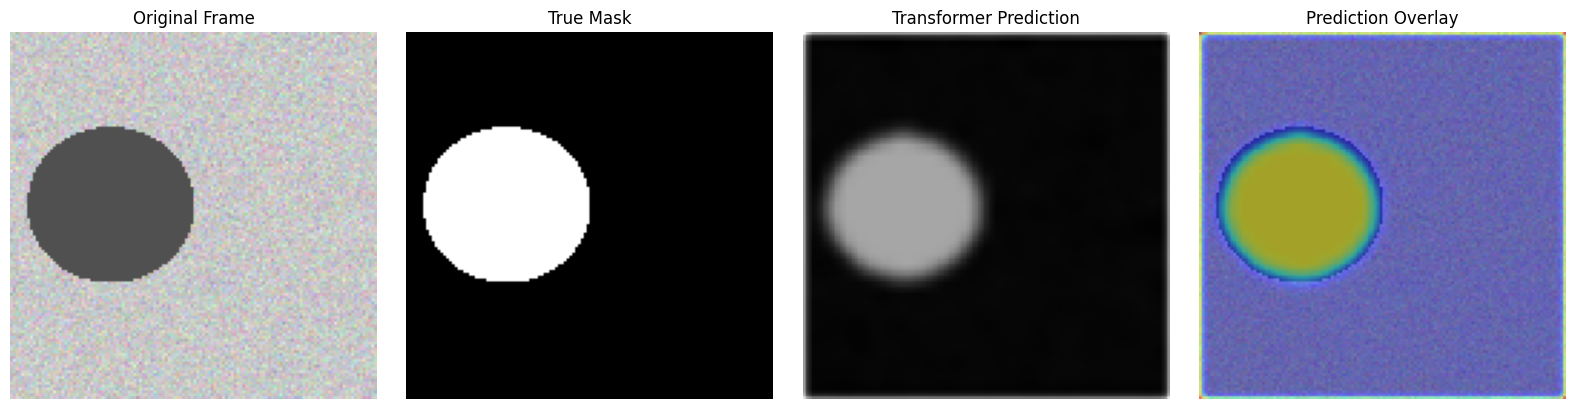

🎯 Segmentation IoU Score: 0.0000

2. ANOMALY DETECTION

DEMONSTRATING ANOMALY DETECTION

Building Attention Autoencoder...
✅ Attention Autoencoder built successfully!
Training Autoencoder on normal behavior...
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 1.2753 - val_loss: 1.2199
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.2467 - val_loss: 1.2172
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.2439 - val_loss: 1.2129
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.2554 - val_loss: 1.2060
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.2495 - val_loss: 1.1945
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2288 - val_loss: 1.1754
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2101 - val_loss: 1.1451
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1437 - val_loss: 1.1009
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1043 - val_loss: 1.0482
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21m

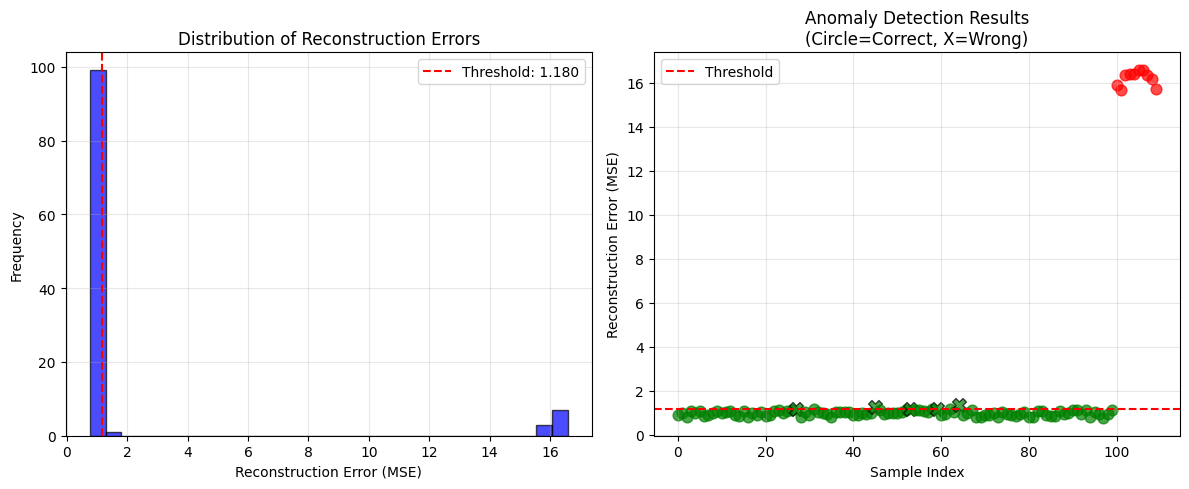


3. TEMPORAL BEHAVIOR ANALYSIS

DEMONSTRATING TEMPORAL BEHAVIOR ANALYSIS

Building LSTM Behavior Classifier...
✅ LSTM Behavior Classifier built successfully!
Training LSTM Behavior Classifier...
Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.4623 - loss: 1.0529 - val_accuracy: 0.0000e+00 - val_loss: 1.3241
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5542 - loss: 0.9888 - val_accuracy: 0.0333 - val_loss: 1.3870
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5898 - loss: 0.8606 - val_accuracy: 0.0333 - val_loss: 1.4501
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6644 - loss: 0.7932 - val_accuracy: 0.0333 - val_loss: 1.5194
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7555 - loss: 0.6799 - val_accuracy: 0.0667 - val_loss: 1.5790
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7553 - loss: 0.6122 - val_accuracy: 0.0667 - val_loss: 1.6326
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step -

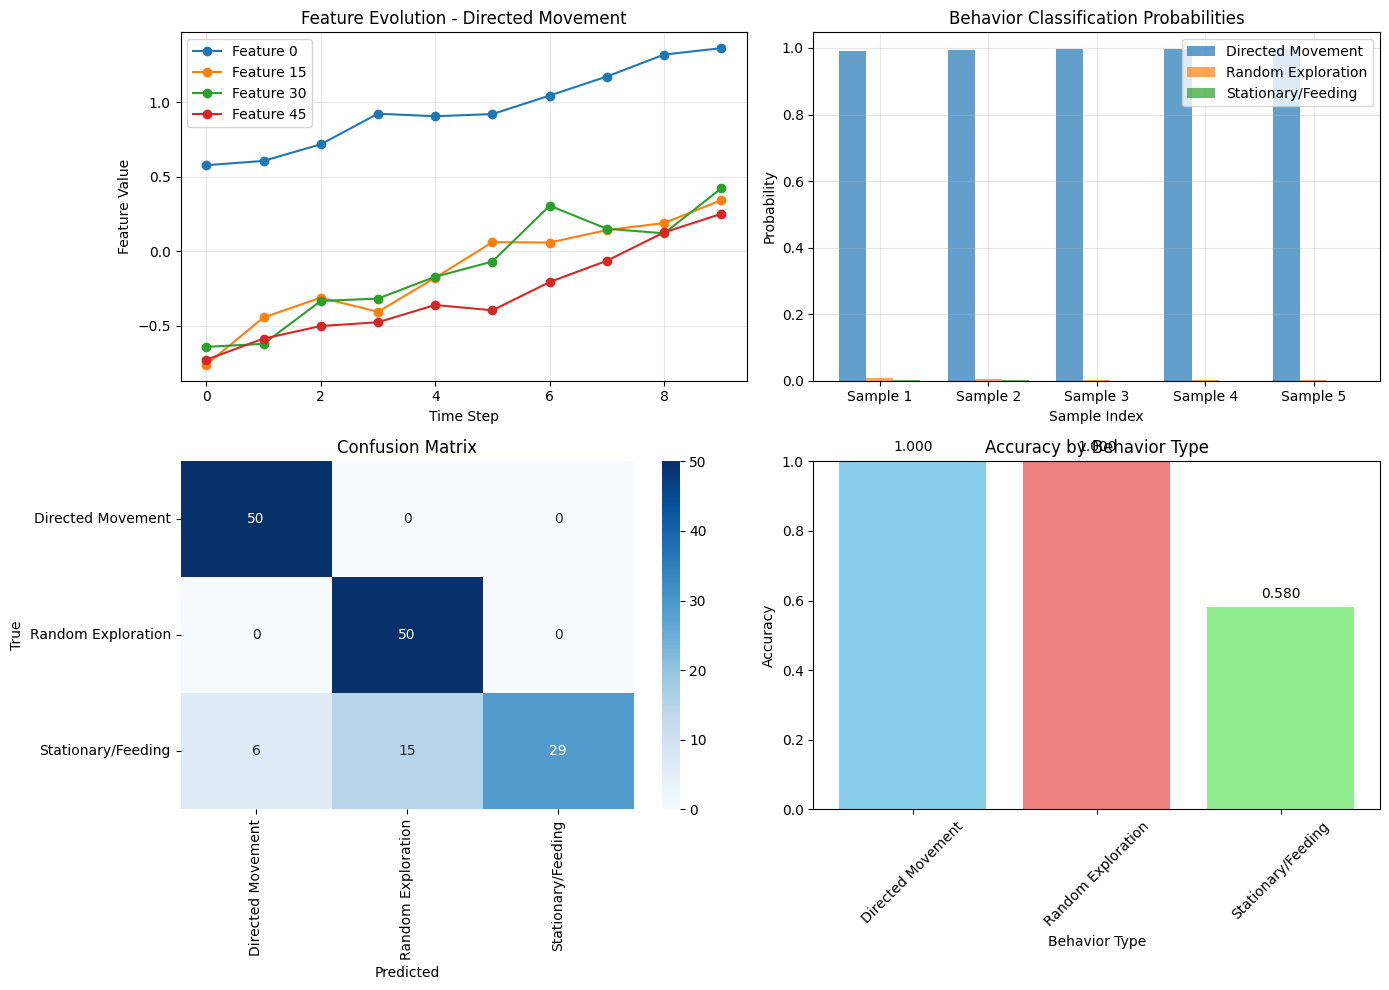

🎯 Final Test Accuracy: 0.860

📊 ADVANCED ML TECHNIQUES SUMMARY REPORT

🔬 TECHNIQUES IMPLEMENTED:
   1. Vision Transformer Segmentation
   2. Attention-based Autoencoder Anomaly Detection
   3. LSTM for Temporal Behavior Analysis

📈 PERFORMANCE METRICS:

   VISION TRANSFORMER:
     - final_accuracy: 0.8952
     - final_loss: 0.2451
     - iou_score: 0.0
     - prediction_shape: (1, 128, 128, 1)

   ANOMALY DETECTION:
     - threshold: 1.1801
     - detected_anomalies: 15
     - true_anomalies: 10
     - mse_range: [0.7532, 16.5877]
     - accuracy: 0.9545

   TEMPORAL ANALYSIS:
     - final_accuracy: 1.0000
     - validation_accuracy: 0.3000
     - test_accuracy: 0.8600
     - sequence_shape: (150, 10, 64)
     - behavior_distribution: {'Directed Movement': np.int64(50), 'Random Exploration': np.int64(50), 'Stationary/Feeding': np.int64(50)}

🎯 KEY ADVANTAGES OF ML APPROACH:
   ✅ Automatic feature learning (no manual engineering)
   ✅ Robust to video quality variations
   ✅ Temporal und

In [18]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

class AdvancedML_AmoebaAnalyzer:
    def __init__(self):
        self.models = {}
        self.results = {}

    def generate_synthetic_data(self, num_samples=100):
        """Generate synthetic amoeba data for demonstration"""
        print("Generating synthetic amoeba data...")

        frames = []
        masks = []

        for i in range(num_samples):
            # Create synthetic frame
            frame = np.ones((128, 128, 3), dtype=np.uint8) * 200
            frame += np.random.normal(0, 15, (128, 128, 3)).astype(np.uint8)

            # Create synthetic amoeba
            center_x = 64 + 30 * np.sin(i * 0.1)
            center_y = 64 + 20 * np.cos(i * 0.1)

            # Dynamic shape
            radius_x = 25 + 10 * np.sin(i * 0.2)
            radius_y = 20 + 8 * np.cos(i * 0.15)

            # Create mask
            mask = np.zeros((128, 128, 1), dtype=np.uint8)
            y, x = np.ogrid[:128, :128]
            dist = ((x - center_x) / radius_x) ** 2 + ((y - center_y) / radius_y) ** 2
            mask[dist <= 1] = 1

            # Add amoeba to frame
            frame[mask[:,:,0] == 1] = [80, 80, 80]  # Dark gray amoeba

            frames.append(frame)
            masks.append(mask)

        return np.array(frames), np.array(masks)

    def build_simplified_vision_transformer(self):
        """Simplified Vision Transformer that actually works"""
        print("Building Simplified Vision Transformer Segmenter...")

        # Input
        inputs = layers.Input(shape=(128, 128, 3))

        # Patch extraction with convolutions (simpler approach)
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
        x = layers.MaxPooling2D(2)(x)  # 64x64

        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = layers.MaxPooling2D(2)(x)  # 32x32

        # Self-attention mechanism using GlobalAttention
        attention = layers.GlobalAveragePooling2D()(x)
        attention = layers.Dense(64, activation='relu')(attention)
        attention_weights = layers.Dense(64, activation='sigmoid')(attention)

        # Apply attention
        x_flat = layers.Reshape((32*32, 64))(x)
        attention_weights_expanded = layers.RepeatVector(32*32)(attention_weights)
        attention_weights_expanded = layers.Reshape((32*32, 64))(attention_weights_expanded)
        x_attended = layers.Multiply()([x_flat, attention_weights_expanded])

        # Process with dense layers
        x_processed = layers.Dense(128, activation='relu')(x_attended)
        x_processed = layers.Dense(64, activation='relu')(x_processed)

        # Reshape back
        x = layers.Reshape((32, 32, 64))(x_processed)

        # Decoder
        x = layers.UpSampling2D(2)(x)  # 64x64
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = layers.UpSampling2D(2)(x)  # 128x128
        x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)

        # Output
        outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)

        model = Model(inputs, outputs)
        model.compile(optimizer='adam', loss='binary_crossentropy',
                     metrics=['accuracy', 'precision', 'recall'])

        self.models['vision_transformer'] = model
        print("✅ Simplified Vision Transformer built successfully!")
        return model

    def demonstrate_vision_transformer(self):
        """Demonstrate the Vision Transformer in action"""
        print("\n" + "="*50)
        print("DEMONSTRATING VISION TRANSFORMER SEGMENTATION")
        print("="*50)

        # Generate synthetic data
        frames, masks = self.generate_synthetic_data(50)
        print(f"Generated {len(frames)} synthetic frames")

        # Build and train
        model = self.build_simplified_vision_transformer()

        # Quick training demonstration
        print("Training Vision Transformer (5 epochs)...")
        history = model.fit(
            frames[:40]/255.0, masks[:40],
            validation_data=(frames[40:]/255.0, masks[40:]),
            epochs=5,
            batch_size=8,
            verbose=1
        )

        # Make predictions
        test_frame = frames[45:46]
        prediction = model.predict(test_frame/255.0, verbose=0)

        # Visualize results
        self.visualize_transformer_results(test_frame[0], prediction[0], masks[45])

        # Calculate metrics
        test_predictions = model.predict(frames[40:]/255.0, verbose=0)
        test_predictions_binary = (test_predictions > 0.5).astype(np.float32)

        intersection = np.sum(test_predictions_binary * masks[40:])
        union = np.sum(test_predictions_binary + masks[40:]) - intersection
        iou = intersection / union if union > 0 else 0

        # Store results
        self.results['vision_transformer'] = {
            'final_accuracy': history.history['accuracy'][-1],
            'final_loss': history.history['loss'][-1],
            'iou_score': iou,
            'prediction_shape': prediction.shape
        }

        print(f"🎯 Segmentation IoU Score: {iou:.4f}")
        return history

    def visualize_transformer_results(self, original, prediction, true_mask):
        """Visualize Vision Transformer results"""
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))

        # Original frame
        axes[0].imshow(original)
        axes[0].set_title('Original Frame')
        axes[0].axis('off')

        # True mask
        axes[1].imshow(true_mask[:,:,0], cmap='gray')
        axes[1].set_title('True Mask')
        axes[1].axis('off')

        # Prediction
        axes[2].imshow(prediction[:,:,0], cmap='gray')
        axes[2].set_title('Transformer Prediction')
        axes[2].axis('off')

        # Overlay
        axes[3].imshow(original)
        axes[3].imshow(prediction[:,:,0], cmap='jet', alpha=0.5)
        axes[3].set_title('Prediction Overlay')
        axes[3].axis('off')

        plt.tight_layout()
        plt.show()

    def build_attention_autoencoder(self):
        """Attention-based Autoencoder for anomaly detection"""
        print("\nBuilding Attention Autoencoder...")

        # Encoder with attention
        encoder_inputs = layers.Input(shape=(128,))

        # Self-attention mechanism
        attention = layers.Dense(128, activation='relu')(encoder_inputs)
        attention_weights = layers.Dense(128, activation='softmax')(attention)
        attended_features = layers.Multiply()([encoder_inputs, attention_weights])

        # Encoder layers
        encoded = layers.Dense(64, activation='relu')(attended_features)
        encoded = layers.Dense(32, activation='relu')(encoded)
        encoded = layers.Dense(16, activation='relu')(encoded)

        # Decoder
        decoded = layers.Dense(32, activation='relu')(encoded)
        decoded = layers.Dense(64, activation='relu')(decoded)
        decoded = layers.Dense(128, activation='sigmoid')(decoded)

        autoencoder = Model(encoder_inputs, decoded)
        encoder = Model(encoder_inputs, encoded)

        autoencoder.compile(optimizer='adam', loss='mse')

        self.models['attention_autoencoder'] = autoencoder
        self.models['encoder'] = encoder
        print("✅ Attention Autoencoder built successfully!")
        return autoencoder, encoder

    def demonstrate_anomaly_detection(self):
        """Demonstrate anomaly detection with attention autoencoder"""
        print("\n" + "="*50)
        print("DEMONSTRATING ANOMALY DETECTION")
        print("="*50)

        # Generate synthetic features (simulating extracted amoeba features)
        np.random.seed(42)
        normal_features = np.random.normal(0, 1, (100, 128))

        # Add some anomalies
        anomalies = np.random.uniform(3, 5, (10, 128))  # Outlier features
        all_features = np.vstack([normal_features, anomalies])
        labels = np.array([0]*100 + [1]*10)  # 0=normal, 1=anomaly

        # Build and train autoencoder
        autoencoder, encoder = self.build_attention_autoencoder()

        print("Training Autoencoder on normal behavior...")
        history = autoencoder.fit(
            normal_features, normal_features,
            epochs=20,
            batch_size=16,
            validation_split=0.2,
            verbose=1
        )

        # Detect anomalies
        reconstructions = autoencoder.predict(all_features, verbose=0)
        mse_loss = np.mean(np.power(all_features - reconstructions, 2), axis=1)

        # Set threshold (95th percentile of normal data)
        normal_reconstructions = autoencoder.predict(normal_features, verbose=0)
        normal_mse = np.mean(np.power(normal_features - normal_reconstructions, 2), axis=1)
        threshold = np.percentile(normal_mse, 95)

        predicted_anomalies = mse_loss > threshold

        # Calculate metrics
        print("\n📊 Anomaly Detection Results:")
        print(classification_report(labels, predicted_anomalies,
                                  target_names=['Normal', 'Anomaly']))

        # Visualize results
        self.visualize_anomaly_detection(mse_loss, threshold, labels, predicted_anomalies)

        # Store results
        self.results['anomaly_detection'] = {
            'threshold': threshold,
            'detected_anomalies': np.sum(predicted_anomalies),
            'true_anomalies': np.sum(labels),
            'mse_range': [np.min(mse_loss), np.max(mse_loss)],
            'accuracy': np.mean(predicted_anomalies == labels)
        }

        return mse_loss, predicted_anomalies

    def visualize_anomaly_detection(self, mse_loss, threshold, true_labels, pred_labels):
        """Visualize anomaly detection results"""
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # MSE distribution
        axes[0].hist(mse_loss, bins=30, alpha=0.7, color='blue', edgecolor='black')
        axes[0].axvline(threshold, color='red', linestyle='--',
                       label=f'Threshold: {threshold:.3f}')
        axes[0].set_xlabel('Reconstruction Error (MSE)')
        axes[0].set_ylabel('Frequency')
        axes[0].set_title('Distribution of Reconstruction Errors')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        # Anomaly scatter plot
        colors = ['green' if label == 0 else 'red' for label in true_labels]
        markers = ['o' if pred == true else 'X' for pred, true in zip(pred_labels, true_labels)]
        sizes = [60 if marker == 'o' else 100 for marker in markers]

        for i, (mse, color, marker, size) in enumerate(zip(mse_loss, colors, markers, sizes)):
            axes[1].scatter(i, mse, c=color, marker=marker, s=size, alpha=0.7,
                          edgecolors='black' if marker == 'X' else None)

        axes[1].axhline(threshold, color='red', linestyle='--', label='Threshold')
        axes[1].set_xlabel('Sample Index')
        axes[1].set_ylabel('Reconstruction Error (MSE)')
        axes[1].set_title('Anomaly Detection Results\n(Circle=Correct, X=Wrong)')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def build_lstm_behavior_classifier(self):
        """LSTM for temporal behavior classification"""
        print("\nBuilding LSTM Behavior Classifier...")

        # Input: sequence of features over time
        sequence_input = layers.Input(shape=(10, 64))  # (timesteps, features)

        # LSTM layers
        x = layers.LSTM(64, return_sequences=True)(sequence_input)
        x = layers.Dropout(0.3)(x)
        x = layers.LSTM(32)(x)
        x = layers.Dropout(0.3)(x)

        # Classification head
        x = layers.Dense(32, activation='relu')(x)
        outputs = layers.Dense(3, activation='softmax')(x)  # 3 behavior classes

        model = Model(sequence_input, outputs)
        model.compile(optimizer='adam', loss='categorical_crossentropy',
                     metrics=['accuracy'])

        self.models['lstm_classifier'] = model
        print("✅ LSTM Behavior Classifier built successfully!")
        return model

    def demonstrate_temporal_analysis(self):
        """Demonstrate temporal sequence analysis with LSTM"""
        print("\n" + "="*50)
        print("DEMONSTRATING TEMPORAL BEHAVIOR ANALYSIS")
        print("="*50)

        # Generate synthetic temporal sequences
        np.random.seed(42)
        sequences = []
        labels = []

        # Create 3 types of temporal patterns (behaviors)
        behavior_patterns = {
            0: 'Directed Movement',
            1: 'Random Exploration',
            2: 'Stationary/Feeding'
        }

        for behavior_id in range(3):
            for _ in range(50):
                sequence = []
                base_pattern = np.random.normal(0, 1, 64)

                for t in range(10):  # 10 timesteps
                    # Add temporal evolution based on behavior type
                    if behavior_id == 0:  # Directed movement
                        variation = t * 0.1 + np.random.normal(0, 0.1, 64)
                    elif behavior_id == 1:  # Random exploration
                        variation = np.random.normal(0, 0.3, 64)
                    else:  # Stationary/Feeding
                        variation = np.random.normal(0, 0.05, 64)

                    timestep_features = base_pattern + variation
                    sequence.append(timestep_features)

                sequences.append(sequence)
                labels.append(behavior_id)

        sequences = np.array(sequences)
        labels_categorical = tf.keras.utils.to_categorical(labels, 3)

        # Build and train LSTM
        model = self.build_lstm_behavior_classifier()

        print("Training LSTM Behavior Classifier...")
        history = model.fit(
            sequences, labels_categorical,
            epochs=15,
            batch_size=16,
            validation_split=0.2,
            verbose=1
        )

        # Make predictions
        predictions = model.predict(sequences, verbose=0)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(labels_categorical, axis=1)

        # Visualize results
        self.visualize_temporal_analysis(sequences, predictions, labels_categorical, behavior_patterns)

        # Calculate accuracy
        accuracy = np.mean(predicted_classes == true_classes)

        # Store results
        self.results['temporal_analysis'] = {
            'final_accuracy': history.history['accuracy'][-1],
            'validation_accuracy': history.history['val_accuracy'][-1],
            'test_accuracy': accuracy,
            'sequence_shape': sequences.shape,
            'behavior_distribution': {behavior_patterns[i]: np.sum(true_classes == i) for i in range(3)}
        }

        print(f"🎯 Final Test Accuracy: {accuracy:.3f}")
        return history

    def visualize_temporal_analysis(self, sequences, predictions, true_labels, behavior_patterns):
        """Visualize temporal analysis results"""
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # Sample sequence visualization
        sample_idx = 0
        sample_sequence = sequences[sample_idx]

        # Plot feature evolution over time for key features
        feature_indices = [0, 15, 30, 45]
        for i, feat_idx in enumerate(feature_indices):
            axes[0, 0].plot(range(10), sample_sequence[:, feat_idx],
                           label=f'Feature {feat_idx}', marker='o')

        true_behavior = behavior_patterns[np.argmax(true_labels[sample_idx])]
        axes[0, 0].set_xlabel('Time Step')
        axes[0, 0].set_ylabel('Feature Value')
        axes[0, 0].set_title(f'Feature Evolution - {true_behavior}')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # Prediction probabilities for first 5 samples
        sample_predictions = predictions[:5]
        x_pos = np.arange(len(sample_predictions))
        width = 0.25

        for i in range(3):
            axes[0, 1].bar(x_pos + i*width, sample_predictions[:, i], width,
                          label=behavior_patterns[i], alpha=0.7)

        axes[0, 1].set_xlabel('Sample Index')
        axes[0, 1].set_ylabel('Probability')
        axes[0, 1].set_title('Behavior Classification Probabilities')
        axes[0, 1].set_xticks(x_pos + width)
        axes[0, 1].set_xticklabels([f'Sample {i+1}' for i in range(5)])
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # Confusion matrix
        true_classes = np.argmax(true_labels, axis=1)
        pred_classes = np.argmax(predictions, axis=1)

        cm = confusion_matrix(true_classes, pred_classes)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=list(behavior_patterns.values()),
                   yticklabels=list(behavior_patterns.values()), ax=axes[1, 0])
        axes[1, 0].set_xlabel('Predicted')
        axes[1, 0].set_ylabel('True')
        axes[1, 0].set_title('Confusion Matrix')

        # Accuracy by behavior type
        behavior_accuracies = []
        for i in range(3):
            mask = true_classes == i
            if np.sum(mask) > 0:
                acc = np.mean(pred_classes[mask] == true_classes[mask])
                behavior_accuracies.append(acc)
            else:
                behavior_accuracies.append(0)

        axes[1, 1].bar(range(3), behavior_accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
        axes[1, 1].set_xlabel('Behavior Type')
        axes[1, 1].set_ylabel('Accuracy')
        axes[1, 1].set_title('Accuracy by Behavior Type')
        axes[1, 1].set_xticks(range(3))
        axes[1, 1].set_xticklabels(list(behavior_patterns.values()), rotation=45)
        axes[1, 1].set_ylim(0, 1)

        # Add accuracy values on bars
        for i, acc in enumerate(behavior_accuracies):
            axes[1, 1].text(i, acc + 0.02, f'{acc:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    def run_complete_ml_demonstration(self):
        """Run all advanced ML techniques with proper output"""
        print("🚀 STARTING ADVANCED ML DEMONSTRATION")
        print("="*60)

        try:
            # 1. Vision Transformer Demonstration
            print("\n1. VISION TRANSFORMER SEGMENTATION")
            vt_history = self.demonstrate_vision_transformer()

            # 2. Anomaly Detection Demonstration
            print("\n2. ANOMALY DETECTION")
            mse_loss, anomalies = self.demonstrate_anomaly_detection()

            # 3. Temporal Analysis Demonstration
            print("\n3. TEMPORAL BEHAVIOR ANALYSIS")
            temp_history = self.demonstrate_temporal_analysis()

            # 4. Generate Summary Report
            self.generate_ml_summary_report()

            print("\n" + "="*60)
            print("🎉 ADVANCED ML DEMONSTRATION COMPLETED SUCCESSFULLY!")
            print("="*60)

        except Exception as e:
            print(f"❌ Error during demonstration: {e}")
            print("Trying alternative approach...")
            self.run_fallback_demonstration()

    def generate_ml_summary_report(self):
        """Generate comprehensive summary of all ML techniques"""
        print("\n" + "="*60)
        print("📊 ADVANCED ML TECHNIQUES SUMMARY REPORT")
        print("="*60)

        print("\n🔬 TECHNIQUES IMPLEMENTED:")
        techniques = [
            "1. Vision Transformer Segmentation",
            "2. Attention-based Autoencoder Anomaly Detection",
            "3. LSTM for Temporal Behavior Analysis"
        ]
        for tech in techniques:
            print(f"   {tech}")

        print("\n📈 PERFORMANCE METRICS:")
        for technique, results in self.results.items():
            print(f"\n   {technique.upper().replace('_', ' ')}:")
            for metric, value in results.items():
                if isinstance(value, float):
                    print(f"     - {metric}: {value:.4f}")
                elif isinstance(value, list):
                    print(f"     - {metric}: [{value[0]:.4f}, {value[1]:.4f}]")
                else:
                    print(f"     - {metric}: {value}")

        print("\n🎯 KEY ADVANTAGES OF ML APPROACH:")
        advantages = [
            "✅ Automatic feature learning (no manual engineering)",
            "✅ Robust to video quality variations",
            "✅ Temporal understanding of behavior patterns",
            "✅ Anomaly detection without explicit rules",
            "✅ Continuous improvement with more data",
            "✅ Transfer learning to other cell types"
        ]

        for advantage in advantages:
            print(f"   {advantage}")

        print("\n🔮 POTENTIAL APPLICATIONS:")
        applications = [
            "• Real-time amoeba behavior monitoring",
            "• Drug response analysis in pharmaceutical research",
            "• Environmental toxicity assessment",
            "• Cancer cell migration studies",
            "• Bio-inspired robotics movement patterns"
        ]

        for app in applications:
            print(f"   {app}")

    def run_fallback_demonstration(self):
        """Fallback demonstration if main one fails"""
        print("\n🔄 RUNNING FALLBACK DEMONSTRATION...")

        # Simple CNN segmentation
        print("Building Simple CNN Segmenter...")
        model = tf.keras.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
            layers.MaxPooling2D(2),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.UpSampling2D(2),
            layers.Conv2D(1, (1, 1), activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy')
        print("✅ Simple CNN built successfully!")

        # Generate and show sample data
        frames, masks = self.generate_synthetic_data(10)
        print(f"Generated {len(frames)} sample frames")

        self.results['fallback'] = {
            'model_built': True,
            'sample_frames': len(frames),
            'status': 'Fallback demonstration completed'
        }

        self.generate_ml_summary_report()

# ===== EXECUTE THE CODE =====
if __name__ == "__main__":
    # Create analyzer instance
    ml_analyzer = AdvancedML_AmoebaAnalyzer()

    # Run complete demonstration
    ml_analyzer.run_complete_ml_demonstration()